In [8]:
import sys
print(sys.version_info)

from sqlalchemy import create_engine
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

print(matplotlib.__version__)

import statistics
import seaborn as sns

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
3.1.3


In [9]:
localhost = {'user': 'postgres', 'password': 'postgres', 'host': 'localhost', 'port': 5432, 'db': 'fiadb'}
params = 'postgresql://{0}:{1}@{2}:{3}/{4}'
engine = create_engine(params.format(localhost['user'], localhost['password'], localhost['host'], localhost['port'], localhost['db']))
# geom_sql = """select distinct grid_id, grid_geom from fs_fiadb.pergrid"""
pergrid_base = """select distinct * from predictor.pergrid_base where fa>0"""
pergrid_base_df = pd.read_sql(pergrid_base, engine)

In [10]:
y = pergrid_base_df['tsr']

In [15]:
y_median = statistics.median(y)
y_median

13.0

In [16]:
y_mean = statistics.mean(y)
y_mean

16.557266666666667

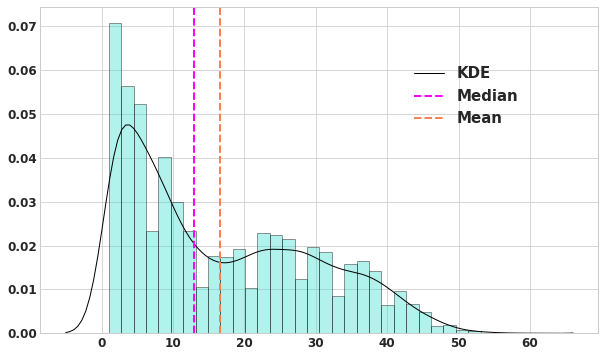

In [17]:

plt.style.use('seaborn-whitegrid')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
plt.rc('legend', fontsize=15)  
fig = plt.figure(figsize=(10,6))
plt.tight_layout()
sns.distplot(y, hist=True, kde=True, axlabel=False,
             hist_kws={"color": "turquoise",'edgecolor':'black'},
             kde_kws={'linewidth': 1, 'label': 'KDE', "color": "black"})
plt.axvline(x=y_median,linewidth=2, color='magenta', linestyle = 'dashed', label='Median')
plt.axvline(x=y_mean,linewidth=2, color='coral', linestyle = 'dashed', label='Mean')
plt.legend(bbox_to_anchor=(0.88,0.86), loc="upper right")